In [ ]:
# Install necessary libraries
!pip install transformers
!pip install diffusers
!pip install accelerate
!pip install torch torchvision

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt
import pickle


In [ ]:
from huggingface_hub import login

# Log in to Hugging Face (replace with your Hugging Face token)
login()

# Load Stable Diffusion model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # Ensure the model uses GPU for acceleration


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

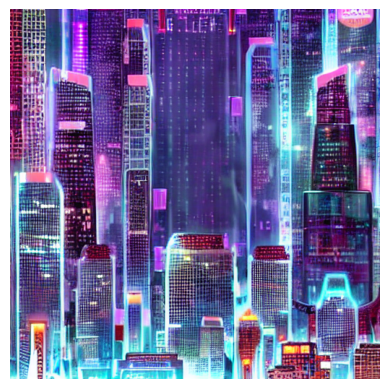

In [ ]:
# Define the input text description
text_description = "cyber city"

# Generate the image
generated_image = pipe(text_description).images[0]

# Display the generated image
plt.imshow(generated_image)
plt.axis("off")
plt.show()

In [ ]:
import pickle
from google.colab import drive

# Save the image locally
generated_image.save("generated_image.png")
with open("generated_image.pkl", "wb") as f:
    pickle.dump(generated_image, f)

# Mount Google Drive (force_remount avoids mount errors)
drive.mount('/content/drive', force_remount=True)

# Save the image to Google Drive (correct path: MyDrive, not My Drive)
generated_image.save('/content/drive/MyDrive/generated_image.png')


Mounted at /content/drive


In [ ]:
from PIL import Image, ImageEnhance, ImageFilter

In [ ]:
editable_image = generated_image.copy()

In [ ]:
def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

In [ ]:
def adjust_contrast(image, factor):
    enhancer = ImageEnhance.Contrast(image)
    return enhancer.enhance(factor)

In [ ]:
def apply_blur(image, radius=2):
    return image.filter(ImageFilter.GaussianBlur(radius))

In [ ]:
# Example Edits
brightened_image = adjust_brightness(editable_image, 1.5)  # Increase brightness
contrast_image = adjust_contrast(editable_image, 1.8)      # Increase contrast
blurred_image = apply_blur(editable_image, radius=3)       # Apply blur


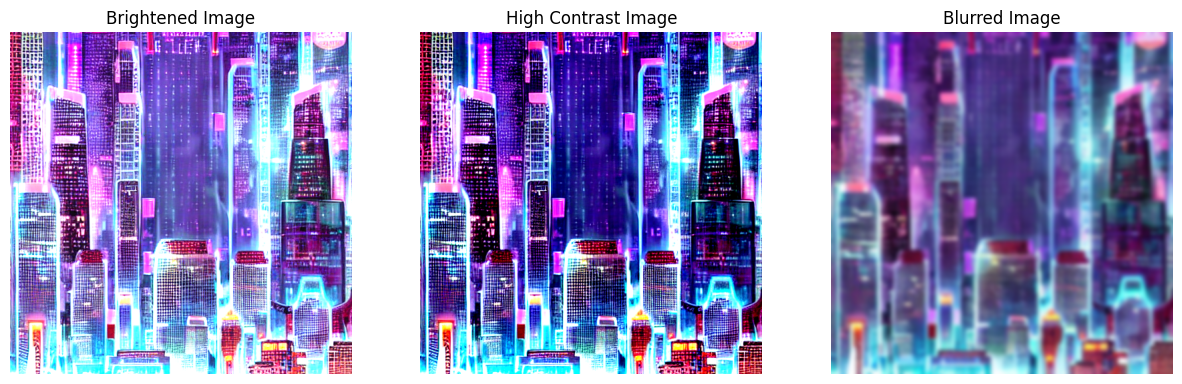

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(brightened_image)
plt.axis("off")
plt.title("Brightened Image")

plt.subplot(1, 3, 2)
plt.imshow(contrast_image)
plt.axis("off")
plt.title("High Contrast Image")

plt.subplot(1, 3, 3)
plt.imshow(blurred_image)
plt.axis("off")
plt.title("Blurred Image")

plt.show()

In [ ]:
brightened_image.save("brightened_image.png")
contrast_image.save("contrast_image.png")
blurred_image.save("blurred_image.png")


In [ ]:
# Save to Google Drive
from google.colab import drive
drive.mount('/content/drive')

brightened_image.save('/content/drive/My Drive/brightened_image.png')
contrast_image.save('/content/drive/My Drive/contrast_image.png')
blurred_image.save('/content/drive/My Drive/blurred_image.png')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
